<center><h1>Sentiment Analysis Project</h1></center>
<br>

#### Created By Mohammad Al Jadallah
#### Date: 11/9/2022

<br>

##### What is Sentiment Analysis (SA)❓
    📍 SA is a method used to extract emotions from a textual data

##### Where is Sentiment Analysis (SA) used❓
    📍 SA is used in social media posts, and product reviews to analyze the emotions of people's reviews

##### What are the benefits of the SA❓
    📍 Help organization develop their strategies
    📍 Help firms to know how the customers feel about them
    📍 Help organizations, and firms in developing their products
    
##### What is polarity❓
    📍 It is a numeric value between [-1, 1] that helps to identify the positive and negative, natural reviews
    
##### What is subjectivity❓
    📍It is a numeric value between [0, 1] that helps to identify if the review is a personal opinion, or factual information, if the value is high so it will be a personal opinion, but if the value is low, so it will be a factual information

##### What is the modules used in this project❓
    📍 pandas: pip install pandas
    📍 textblob: pip install textblob
    📍 seaborn: pip install seaborn

##### About the project:
    📍 Read the data and get the important data as a review then check if there missing values or not, also do a polarity column and a subjectivity column to know about the positive and negative, also natural reviews
    📍 The size of data
    📍 average and percent of positive, negative, and natural reviews
    📍 Trying the two algorithms: NaiveBayesAnalyzer, PatternAnalyzer

In [1]:
# Dependencies...
import pandas as pd  # Reading and manipulate the data
import textblob as blob  # Sentiment analysis module
# To make sure no problems with training the classifer on the reviews of the movie
import nltk
nltk.download('punkt')
nltk.download('movie_reviews')
# Two algorthims "Analyzers" to use them on the textual data
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer
# Visualization module
import seaborn as sea
import matplotlib.pyplot as plt
# Blobber is faster than TextBlob Class when use a NaiveBayesAnalyzer
from textblob import Blobber

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Wesam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Wesam\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [2]:
# Read the data
df = pd.read_csv(r"Hotel_Reviews.csv")

In [3]:
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


In [4]:
df.size, df.shape

(8767546, (515738, 17))

In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [6]:
# checking missing values
number_of_misiing_values = df.isnull().sum().sum()
if number_of_misiing_values == 0: print("There are no missing values...")
else: print("There are missing values. Number of missing values is {}".format(number_of_misiing_values))

There are missing values. Number of missing values is 6536


#### Missing values removal
    df.dropna(axis=0).shape
##### You can remove the missing values using the above command, but if you focused on the columns, you will notice that no missing values in the columns we need (Negative_Review, Positive_Review), I will not remove the missing values.


In [7]:
# show the columns we need
df[["Positive_Review", "Negative_Review"]]


,Positive_Review,Negative_Review
0,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...
1,No real complaints the hotel was great great ...,No Negative
2,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...
3,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...
4,Amazing location and building Romantic setting,You When I booked with your company on line y...
...,...,...
515733,location,no trolly or staff to help you take the lugga...
515734,Breakfast was ok and we got earlier check in,The hotel looks like 3 but surely not 4
515735,No Positive,The ac was useless It was a hot week in vienn...
515736,The rooms are enormous and really comfortable...,No Negative


In [8]:
# Concat the two columns
df_conc = pd.concat([df["Positive_Review"], df["Negative_Review"]], axis=0)
df_conc = df_conc.to_frame()
df_conc

,0
0,Only the park outside of the hotel was beauti...
1,No real complaints the hotel was great great ...
2,Location was good and staff were ok It is cut...
3,Great location in nice surroundings the bar a...
4,Amazing location and building Romantic setting
...,...
515733,no trolly or staff to help you take the lugga...
515734,The hotel looks like 3 but surely not 4
515735,The ac was useless It was a hot week in vienn...
515736,No Negative


In [9]:
# Clean data
# get rid of the "no negitive", and "no positive" data, because they mean that the person did not give a review
new_df_con = df_conc[(df_conc[0] != "No Negative") & (df_conc[0] != "No Posative")]

### new_sample

In [10]:
# Show a shufilled sample
sample = new_df_con.sample(100000, random_state=1)  # random_state=1 to save the same version of last df
sample

,0
21124,No
114026,Pool was cold bed was uncomfortable
402516,Pool was smaller than it looked No parking wa...
154068,Staff are friendly room were very nice and clean
141946,The TV was a bit small
...,...
6896,The fact we couldn t stay longer
389922,Mix up from Bookings com on the reservation n...
203717,Lovely hotel near Opera We walked down from G...
408082,Food and drink expensive but so is the whole ...


In [11]:
# Exmple how to find the polarity
print(blob.TextBlob('The fact we couldn t stay longer', analyzer=NaiveBayesAnalyzer()).sentiment)
bb = Blobber(analyzer=NaiveBayesAnalyzer())
bb('The fact we couldn t stay longer').sentiment.classification

Sentiment(classification='neg', p_pos=0.45289718491592307, p_neg=0.5471028150840768)


'neg'

In [12]:
analyzer = PatternAnalyzer()
polarity_naive = Blobber(analyzer=NaiveBayesAnalyzer())

def sentimental_polarity(text):
    global analyzer, polarity_naive
    try:
        if isinstance(analyzer, PatternAnalyzer):
            polarity = blob.TextBlob(text, analyzer=analyzer).sentiment.polarity
            if polarity > 0:
                # Positive values
                return polarity
            elif polarity < 0:
                # Negative values
                return polarity
            elif polarity == 0:
                # Natural values
                return polarity
        else:
            # polarity_naive = Blobber(analyzer=NaiveBayesAnalyzer())
            polarity_naive1 = polarity_naive(text).sentiment
            # polarity_naive = blob.TextBlob(text, analyzer=NaiveBayesAnalyzer()).sentiment
            polarity_neg = polarity_naive1.p_neg
            polarity_pos = polarity_naive1.p_pos
            
            if polarity_naive1.classification == 'pos':
                # Positive values
                return polarity_pos
            elif polarity_naive1.classification == 'neg':
                # Negative values
                return polarity_neg * -1
            else:
                # Natural values
                return 0.0
    except:
        return None

In [13]:
new_sample = sample.copy()
new_sample['pattern_analyzer_polarity'] = round(sample[0].apply(sentimental_polarity), 1)

In [14]:
new_sample

,0,pattern_analyzer_polarity
21124,No,0.0
114026,Pool was cold bed was uncomfortable,-0.6
402516,Pool was smaller than it looked No parking wa...,0.2
154068,Staff are friendly room were very nice and clean,0.5
141946,The TV was a bit small,-0.2
...,...,...
6896,The fact we couldn t stay longer,0.0
389922,Mix up from Bookings com on the reservation n...,-0.0
203717,Lovely hotel near Opera We walked down from G...,0.3
408082,Food and drink expensive but so is the whole ...,-0.2


In [15]:
# Using NaiveBayesAnalyzer()
analyzer = NaiveBayesAnalyzer()
new_sample['naivebayes_analyzer_polarity'] = round(sample[0].apply(sentimental_polarity), 1)  # Round the values

In [16]:
# Rename the column 0 to text
new_sample.rename(columns={0: "text"}, inplace=True)

In [17]:
new_sample

,text,pattern_analyzer_polarity,naivebayes_analyzer_polarity
21124,No,0.0,0.5
114026,Pool was cold bed was uncomfortable,-0.6,0.6
402516,Pool was smaller than it looked No parking wa...,0.2,1.0
154068,Staff are friendly room were very nice and clean,0.5,0.8
141946,The TV was a bit small,-0.2,0.6
...,...,...,...
6896,The fact we couldn t stay longer,0.0,-0.5
389922,Mix up from Bookings com on the reservation n...,-0.0,0.7
203717,Lovely hotel near Opera We walked down from G...,0.3,1.0
408082,Food and drink expensive but so is the whole ...,-0.2,-0.6


In [18]:
# Create a new column that specify the natural, negative, positive values
def classify(value):
    if value > 0:
        return "positive"
    elif value < 0:
        return "negative"
    elif value == 0:
        return "natural"

In [19]:
# # apply the classify function
new_sample['pattern_analyzer_type_polarity'] = new_sample['pattern_analyzer_polarity'].apply(classify)
new_sample['naivebayes_analyzer_type_polarity'] = new_sample['naivebayes_analyzer_polarity'].apply(classify)

In [20]:
new_sample

,text,pattern_analyzer_polarity,naivebayes_analyzer_polarity,pattern_analyzer_type_polarity,naivebayes_analyzer_type_polarity
21124,No,0.0,0.5,natural,positive
114026,Pool was cold bed was uncomfortable,-0.6,0.6,negative,positive
402516,Pool was smaller than it looked No parking wa...,0.2,1.0,positive,positive
154068,Staff are friendly room were very nice and clean,0.5,0.8,positive,positive
141946,The TV was a bit small,-0.2,0.6,negative,positive
...,...,...,...,...,...
6896,The fact we couldn t stay longer,0.0,-0.5,natural,negative
389922,Mix up from Bookings com on the reservation n...,-0.0,0.7,natural,positive
203717,Lovely hotel near Opera We walked down from G...,0.3,1.0,positive,positive
408082,Food and drink expensive but so is the whole ...,-0.2,-0.6,negative,negative


In [21]:
positive_examples1 = new_sample['pattern_analyzer_type_polarity'][new_sample['pattern_analyzer_type_polarity'] == 'positive']
positive_examples2 = new_sample['naivebayes_analyzer_type_polarity'][new_sample['naivebayes_analyzer_type_polarity'] == 'positive']

In [22]:
print(positive_examples1, "=" * 100, positive_examples2, sep='\n')

402516    positive
154068    positive
437170    positive
242609    positive
474937    positive
            ...   
54463     positive
462772    positive
206621    positive
180152    positive
203717    positive
Name: pattern_analyzer_type_polarity, Length: 56381, dtype: object
21124     positive
114026    positive
402516    positive
154068    positive
141946    positive
            ...   
206621    positive
180152    positive
389922    positive
203717    positive
72415     positive
Name: naivebayes_analyzer_type_polarity, Length: 67736, dtype: object


In [23]:
negative_examples1 = new_sample['pattern_analyzer_type_polarity'][new_sample['pattern_analyzer_type_polarity'] == 'negative']
negative_examples2 = new_sample['naivebayes_analyzer_type_polarity'][new_sample['naivebayes_analyzer_type_polarity'] == 'negative']

In [24]:
print(negative_examples1, "=" * 100, negative_examples2, sep='\n')

114026    negative
141946    negative
26815     negative
76197     negative
501575    negative
            ...   
221260    negative
41413     negative
115494    negative
118451    negative
408082    negative
Name: pattern_analyzer_type_polarity, Length: 19245, dtype: object
315617    negative
76197     negative
22629     negative
13415     negative
282724    negative
            ...   
22720     negative
413169    negative
142119    negative
6896      negative
408082    negative
Name: naivebayes_analyzer_type_polarity, Length: 32264, dtype: object


In [25]:
natural_examples1 = new_sample['pattern_analyzer_type_polarity'][new_sample['pattern_analyzer_type_polarity'] == 'natural']
natural_examples2 = new_sample['naivebayes_analyzer_type_polarity'][new_sample['naivebayes_analyzer_type_polarity'] == 'natural']

In [26]:
print(natural_examples1, "=" * 100, natural_examples2, sep='\n')

21124     natural
133181    natural
264028    natural
126603    natural
315617    natural
           ...   
460939    natural
142119    natural
6896      natural
389922    natural
72415     natural
Name: pattern_analyzer_type_polarity, Length: 24374, dtype: object
Series([], Name: naivebayes_analyzer_type_polarity, dtype: object)


In [27]:
# calculate the average | Pattern Analyzer
# Positive
print("Pattern Analyzer")

paMeanOfPos = new_sample['pattern_analyzer_polarity'][new_sample['pattern_analyzer_polarity'] > 0].mean()

print("Average of positive examples as a numeric values:",
      round(paMeanOfPos, 2))

print("Percentage of positive examples as a labels:",
      round(new_sample['pattern_analyzer_type_polarity'][new_sample['pattern_analyzer_type_polarity'] ==
                                                         'positive'].count() / new_sample['pattern_analyzer_type_polarity'].count() * 100, 2), "%", sep='')

Pattern Analyzer
Average of positive examples as a numeric values: 0.45
Percentage of positive examples as a labels:56.38%


In [28]:
# calculate the average | NaiveBayes Analyzer
# Positive
print("Naive Bayes Analyzer")

nbMeanOfPos = new_sample['naivebayes_analyzer_polarity'][new_sample['naivebayes_analyzer_polarity'] > 0].mean()

print("Average of positive examples as a numeric values:",
      round(nbMeanOfPos, 2))

print("Percentage of positive examples as a labels:",
      round(new_sample['naivebayes_analyzer_type_polarity'][new_sample['naivebayes_analyzer_type_polarity'] == 
                                                            'positive'].count() /  new_sample['naivebayes_analyzer_type_polarity'].count(), 2) * 100, "%", sep='')

Naive Bayes Analyzer
Average of positive examples as a numeric values: 0.78
Percentage of positive examples as a labels:68.0%


In [29]:
# Negative
print("Pattern Analyzer")

paMeanOfNeg = new_sample['pattern_analyzer_polarity'][new_sample['pattern_analyzer_polarity'] < 0].abs().mean()

print("Average of negative examples as a numeric values:", 
      round(paMeanOfNeg, 2))

print("Percentage of negative examples as a labels:",
      round(new_sample['pattern_analyzer_type_polarity'][new_sample['pattern_analyzer_type_polarity'] ==
                                                         'negative'].count() / new_sample['pattern_analyzer_type_polarity'].count(), 2) * 100, "%", sep='')

Pattern Analyzer
Average of negative examples as a numeric values: 0.23
Percentage of negative examples as a labels:19.0%


In [30]:
# Negative
print("Naive Bayes Analyzer")

nbMeanOfNeg = new_sample['naivebayes_analyzer_polarity'][new_sample['naivebayes_analyzer_polarity'] < 0].abs().mean()

print("Average of negative examples as a numeric values:", 
      round(nbMeanOfNeg, 2))

print("Percentage of negative examples as a labels:",
      round(new_sample['naivebayes_analyzer_type_polarity'][new_sample['naivebayes_analyzer_type_polarity'] == 
                                                            'negative'].count() / new_sample['naivebayes_analyzer_type_polarity'].count(), 2) * 100, "%", sep='')

Naive Bayes Analyzer
Average of negative examples as a numeric values: 0.64
Percentage of negative examples as a labels:32.0%


In [31]:
# Natural
print("Pattern Analyzer")

print("Average of natural examples as a numeric values:",
      round(new_sample['pattern_analyzer_polarity'][new_sample['pattern_analyzer_polarity'] == 0].mean(), 2))
print("Percentage of natural examples as a labels:",
      round(new_sample['pattern_analyzer_type_polarity'][new_sample['pattern_analyzer_type_polarity'] == 
                                                         'natural'].count() / new_sample['pattern_analyzer_type_polarity'].count(), 2) * 100, "%", sep='')

Pattern Analyzer
Average of positive examples as a numeric values: 0.0
Percentage of natural examples as a labels:24.0%


In [32]:
# Natural
print("Naive Bayes Analyzer")

print("Average of natural examples as a numeric values:",
      round(new_sample['naivebayes_analyzer_polarity'][new_sample['naivebayes_analyzer_polarity'] == 0].mean(), 2))
print("Percentage of natural examples as a labels:",
      round(new_sample['naivebayes_analyzer_type_polarity'][new_sample['naivebayes_analyzer_type_polarity'] == 
                                                         'natural'].count() / new_sample['naivebayes_analyzer_type_polarity'].count(), 2) * 100, "%", sep='')

Naive Bayes Analyzer
Average of positive examples as a numeric values: nan
Percentage of natural examples as a labels:0.0%


In [33]:
x=[round(paMeanOfPos, 1),
   round(paMeanOfNeg, 1),
   round(nbMeanOfPos, 1),
   round(nbMeanOfNeg, 1)]
y=["PatternAnalyzer Average Positive Examples", 
    "PatternAnalyzer Average Negative Examples", 
    "NaiveBayesAnalyzer Average Positive Examples", 
    "NaiveBayesAnalyzer Average Negative Examples"]

pd.DataFrame(data=[x], columns=y)

,PatternAnalyzer Average Positive Examples,PatternAnalyzer Average Negative Examples,NaiveBayesAnalyzer Average Positive Examples,NaiveBayesAnalyzer Average Negative Examples
0,0.5,0.2,0.8,0.6


<AxesSubplot: title={'center': 'Average of Positive and Negative Examples\n'}>

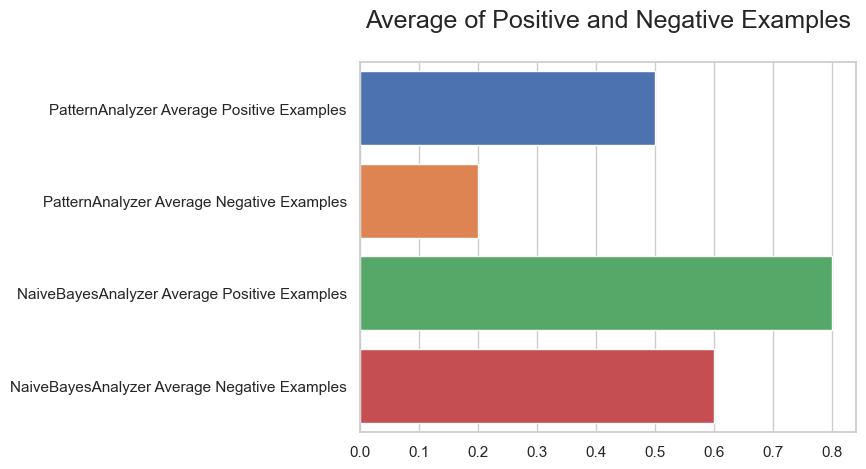

In [37]:
plt.title("Average of Positive and Negative Examples\n").set_fontsize('18')
sea.set(palette='deep', context='notebook', font='sans-serif', style='whitegrid')
sea.barplot(x=x, y=y, 
           saturation=1)

In [35]:
# Additinal
# This command is to see the too string 
pd.options.display.max_colwidth = 1000

In [36]:
df_conc.iloc[:10]

,0
0,Only the park outside of the hotel was beautiful
1,No real complaints the hotel was great great location surroundings rooms amenities and service Two recommendations however firstly the staff upon check in are very confusing regarding deposit payments and the staff offer you upon checkout to refund your original payment and you can make a new one Bit confusing Secondly the on site restaurant is a bit lacking very well thought out and excellent quality food for anyone of a vegetarian or vegan background but even a wrap or toasted sandwich option would be great Aside from those minor minor things fantastic spot and will be back when i return to Amsterdam
2,Location was good and staff were ok It is cute hotel the breakfast range is nice Will go back
3,Great location in nice surroundings the bar and restaurant are nice and have a lovely outdoor area The building also has quite some character
4,Amazing location and building Romantic setting
5,Good restaurant with modern design great chill out place Great park nearby the hotel and awesome main stairs
6,The room is spacious and bright The hotel is located in a quiet and beautiful park
7,Good location Set in a lovely park friendly staff Food high quality We Oth enjoyed the breakfast
8,No Positive
9,The room was big enough and the bed is good The breakfast food and service on the hotel is good outside the hotel there is a big park which is very good for walk in the morning and evening Many people are having picnics and do some bicycling


<br>
<h1 style="text-align: center">GOOD LUCK<h1>